In [2]:
import os,sys
sys.path.insert(1, os.path.join(sys.path[0], 'utils'))
from mpl_toolkits import mplot3d
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import read_camera
import transform
import pprint
import scipy.linalg
import rigid_transform
from matplotlib.tri import Triangulation

## Endoscope Calibration (1)

In [3]:
endoscope_points = np.matrix([(-0.0403883004711487, -0.022245901233518682, 0.1408708510638298),
  (-0.02963259211751237, -0.021654986434428435, 0.14238559139784948),
  (-0.01931437686530927, -0.020883397449382075, 0.14393326086956523),
  (-0.008158566730253173, -0.020434195420923312, 0.14551494505494506),
  (0.0025932309307244742, -0.02004363421632006, 0.14713177777777778),
  (-0.04171045589502573, -0.012324899316019239, 0.14012550264550266),
  (-0.030532856528734467, -0.011536318816095214, 0.1408708510638298),
  (-0.019856125591119045, -0.010747883300702076, 0.1408708510638298),
  (-0.008813540176433071, -0.0103278588544787, 0.14512442790289481),
  (0.0021457302135707667, -0.009556582620545474, 0.14471978142076503),
  (-0.0422860087219479, -0.001989333349715369, 0.13722134715025908),
  (-0.031249695921187735, -0.0013311188178685596, 0.13865821989528798),
  (-0.02040523127893262, -0.0005547388023471693, 0.1385762080942873),
  (-0.009065471102914578, 9.261241671573328e-05, 0.14012550264550266),
  (0.001825851082192271, 0.0008158375917306268, 0.1408708510638298),
  (-0.04349926025609957, 0.00860958350570179, 0.13581394871794875),
  (-0.03138849873276434, 0.009132980173516802, 0.1337386817635992),
  (-0.02117447871697338, 0.010031797743924419, 0.13707075671929306),
  (-0.00958159460589088, 0.010746827920529927, 0.13722134715025908),
  (0.0014018076302353744, 0.011349641240254144, 0.13793604166666668),
  (-0.04315446968893573, 0.018735136864557023, 0.12982215686274512),
  (-0.03296273384913429, 0.020184618657195206, 0.1344351269035533),
  (-0.021691791553972002, 0.020675330107786875, 0.13375616161616163),
  (-0.010128170813382775, 0.021516514925612545, 0.13512102040816326),
  (0.000971962579446993, 0.02207958181561548, 0.13572371773072542)])
pprint.pprint(endoscope_points)


matrix([[-4.03883005e-02, -2.22459012e-02,  1.40870851e-01],
        [-2.96325921e-02, -2.16549864e-02,  1.42385591e-01],
        [-1.93143769e-02, -2.08833974e-02,  1.43933261e-01],
        [-8.15856673e-03, -2.04341954e-02,  1.45514945e-01],
        [ 2.59323093e-03, -2.00436342e-02,  1.47131778e-01],
        [-4.17104559e-02, -1.23248993e-02,  1.40125503e-01],
        [-3.05328565e-02, -1.15363188e-02,  1.40870851e-01],
        [-1.98561256e-02, -1.07478833e-02,  1.40870851e-01],
        [-8.81354018e-03, -1.03278589e-02,  1.45124428e-01],
        [ 2.14573021e-03, -9.55658262e-03,  1.44719781e-01],
        [-4.22860087e-02, -1.98933335e-03,  1.37221347e-01],
        [-3.12496959e-02, -1.33111882e-03,  1.38658220e-01],
        [-2.04052313e-02, -5.54738802e-04,  1.38576208e-01],
        [-9.06547110e-03,  9.26124167e-05,  1.40125503e-01],
        [ 1.82585108e-03,  8.15837592e-04,  1.40870851e-01],
        [-4.34992603e-02,  8.60958351e-03,  1.35813949e-01],
        [-3.13884987e-02

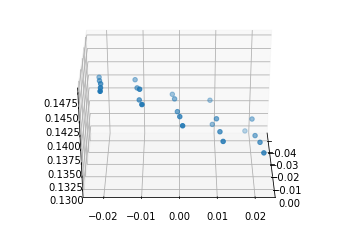

In [8]:
fig = plt.figure()
ax = plt.axes(projection='3d')
X = endoscope_points[:,0]
Y = endoscope_points[:,1]
Z = endoscope_points[:,2]
ax.scatter3D(X, Y, Z)

def rotate(angle):
    ax.view_init(azim=angle)

rot_animation = animation.FuncAnimation(fig, rotate, frames=np.arange(0,362,2),interval=100)
rot_animation.save('./endoscope_raw.gif', dpi=80, writer='imagemagick')

[[-4.03883005e-02 -2.22459012e-02  1.40870851e-01]
 [-2.96325921e-02 -2.16549864e-02  1.42385591e-01]
 [-1.93143769e-02 -2.08833974e-02  1.43933261e-01]
 [-8.15856673e-03 -2.04341954e-02  1.45514945e-01]
 [ 2.59323093e-03 -2.00436342e-02  1.47131778e-01]
 [-4.17104559e-02 -1.23248993e-02  1.40125503e-01]
 [-3.05328565e-02 -1.15363188e-02  1.40870851e-01]
 [-1.98561256e-02 -1.07478833e-02  1.40870851e-01]
 [-8.81354018e-03 -1.03278589e-02  1.45124428e-01]
 [ 2.14573021e-03 -9.55658262e-03  1.44719781e-01]
 [-4.22860087e-02 -1.98933335e-03  1.37221347e-01]
 [-3.12496959e-02 -1.33111882e-03  1.38658220e-01]
 [-2.04052313e-02 -5.54738802e-04  1.38576208e-01]
 [-9.06547110e-03  9.26124167e-05  1.40125503e-01]
 [ 1.82585108e-03  8.15837592e-04  1.40870851e-01]
 [-4.34992603e-02  8.60958351e-03  1.35813949e-01]
 [-3.13884987e-02  9.13298017e-03  1.33738682e-01]
 [-2.11744787e-02  1.00317977e-02  1.37070757e-01]
 [-9.58159461e-03  1.07468279e-02  1.37221347e-01]
 [ 1.40180763e-03  1.13496412e-

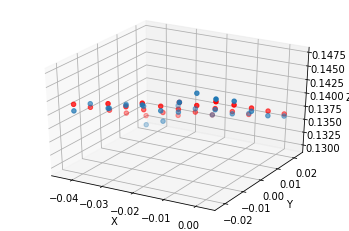

In [7]:
order = 1    # 1: linear, 2: quadratic
if order == 1:
    # best-fit linear plane
    A = np.c_[X, Y, np.ones((25, 1))]
    C,_,_,_ = scipy.linalg.lstsq(A, Z)    # coefficients
    
    # evaluate it on grid
    z = np.asscalar(C[0])*X + np.asscalar(C[1])*Y + np.asscalar(C[2])
    
    # or expressed using matrix/vector product
    #Z = np.dot(np.c_[XX, YY, np.ones(XX.shape)], C).reshape(X.shape)
print(endoscope_points)
print(np.hstack((X, Y, z)))
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, alpha=0.2)
ax.scatter(X, Y, z, c='r')
ax.scatter(X, Y, Z)
plt.xlabel('X')
plt.ylabel('Y')
ax.set_zlabel('Z')
ax.axis('equal')
ax.axis('tight')
plt.show()

rot_animation = animation.FuncAnimation(fig, rotate, frames=np.arange(0,362,2),interval=100)
rot_animation.save('./endoscope.gif', dpi=80, writer='imagemagick')

## World

In [ ]:
world_pts = transform.generate_world()
pprint.pprint(world_pts)

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')
X = world_pts[:,0]
Y = world_pts[:,1]
Z = world_pts[:,2]
ax.scatter3D(X, Y, Z)

rot_animation = animation.FuncAnimation(fig, rotate, frames=np.arange(0, 362, 2), interval=100)
# rot_animation.save('../world.gif', dpi=80, writer='imagemagick')

## PSM2 Data

In [ ]:
psm2_data = list(transform.load_all('world/psm2_recordings.txt'))
psm2_pts = transform.psm_data_to_matrix(psm2_data)
pprint.pprint(psm2_pts)

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')
X = psm2_pts[:,0]
Y = psm2_pts[:,1]
Z = psm2_pts[:,2]
ax.scatter3D(X, Y, Z)

rot_animation = animation.FuncAnimation(fig, rotate, frames=np.arange(0, 362, 2), interval=100)

## Transformations (ENDOSCOPE & PSM2)

In [ ]:
T2_E = transform.get_transform("PSM2", "Endoscope", psm2_pts, endoscope_points)
TE_2 = transform.get_transform("Endoscope", "PSM2", endoscope_points, psm2_pts)

In [ ]:
psm2_e = transform.transform_data("PSM2", "Endoscope", psm2_pts, T2_E, endoscope_points)
psme_2 = transform.transform_data("Endoscope", "PSM2", endoscope_points, TE_2, psm2_pts)

## PSM2 Transformed to Endoscope

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')
X = psm2_e[:,0]
Y = psm2_e[:,1]
Z = psm2_e[:,2]
ax.scatter3D(X, Y, Z)

rot_animation = animation.FuncAnimation(fig, rotate, frames=np.arange(0, 362, 2), interval=100)



## Endoscope Transformed to PSM2

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')
X = psme_2[:,0]
Y = psme_2[:,1]
Z = psme_2[:,2]
ax.scatter3D(X, Y, Z)

rot_animation = animation.FuncAnimation(fig, rotate, frames=np.arange(0, 362, 2), interval=100)


## Endoscope Calibration (2)

In [ ]:
raw_points = list(read_camera.load_all('calibration/endoscope_chesspts.p'))
world_endo = np.matrix(raw_points[0])
pprint.pprint(world_endo)
fig = plt.figure()
ax = plt.axes(projection='3d')
X = world_endo[:,0]
Y = world_endo[:,1]
Z = world_endo[:,2]
ax.scatter3D(X, Y, Z)

def rotate(angle):
    ax.view_init(azim=angle)

rot_animation = animation.FuncAnimation(fig, rotate, frames=np.arange(0, 362, 2), interval=100)
# rot_animation.save('../../world_endoscope.gif', dpi=80, writer='imagemagick')